# Synthetic Model 

Notebook to generate a set of models.

#### Import libraries

In [1]:
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_model.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [4]:
import auxiliary_functions as func

#### Loading 2D grid properties

In [5]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

In [6]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### List of saved files

In [7]:
saved_files = []

### Observation area

In [8]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


## Regional Field

In [9]:
inc_gf , dec_gf = (-20.,-20.) 

## Create a model w/ the presence of Remanence Magnetization 

In [10]:
model_remanent = dict()

### main field

In [11]:
model_remanent['main_field'] = (inc_gf,dec_gf)

### Magnetization direction of bodies

In [12]:
model_remanent['m'] = 10.
model_remanent['inc'] = -45.
model_remanent['dec'] = 30.

mag_tot_R = ang2vec(model_remanent['m'],
                  model_remanent['inc'],
                  model_remanent['dec'])

model_remanent['magnetization'] = mag_tot_R

#### Setting bounds of a polygonal cross-section

<IPython.core.display.Javascript object>


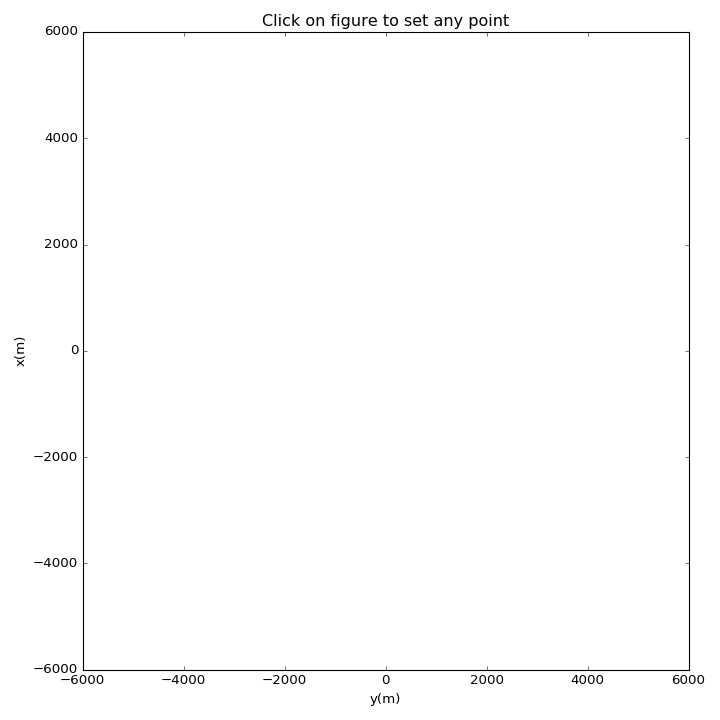

In [13]:
% matplotlib notebook
fig = plt.figure(figsize=(9,9), tight_layout=True)

ax = fig.add_subplot(111)
ax.set_title('Click on figure to set any point')
ax.axis([regular['y'].min(), regular['y'].max(), regular['x'].min(), regular['x'].max()])
ax.set_ylabel('x(m)')
ax.set_xlabel('y(m)')


line, = ax.plot([], [])
line.figure.canvas.draw()
x = []
y = []
plotx = []
ploty = []
def pick(event):
    if event.inaxes != ax.axes:
        return 'It must be any point over de area '
    x.append(event.ydata)
    y.append(event.xdata)
    plotx.append(event.xdata)
    ploty.append(event.ydata)
    line.set_color('r')
    line.set_marker('o')
    line.set_linestyle('')
    line.set_data(plotx,ploty)
    line.figure.canvas.draw()

line.figure.canvas.mpl_connect('button_press_event', pick)

plt.show()


In [14]:
print x

[]


In [15]:
print y

[]


### Vertices of a Polygonal prism-1

In [16]:
model_remanent['x1_verts'] = [-120.86173387456893, 217.88504245497916, -139.68099922621059, -1005.3672054017161, -2002.788269038715, -3019.0285980273529, -3884.7148042028603, -4204.6423151807649, -3809.4377427962945, -2360.3543107199021, -1494.6681045443956, -666.62042907216983, -120.86173387456893]
model_remanent['y1_verts'] = [-1475.5336403581159, -822.01437309183802, -227.90594830431655, -386.33486158098731, -623.97823149599935, -604.17461733641267, -227.90594830431655, -1020.0505146876794, -1594.3553253156206, -1574.5517111560348, -1297.3011129218594, -1396.3191837197774, -1475.5336403581159]

In [17]:
model_remanent['z1_top'] = 450.
model_remanent['z1_bottom'] = 3000.

In [18]:
model_remanent['verts1'] = zip(model_remanent['x1_verts'],
                                   model_remanent['y1_verts'] )

### Vertices of a polygonal prism-2

In [19]:
model_remanent['x2_verts'] = [-3105.5970463493841, -3086.777780997742, -3858.3676604150423, -3858.3676604150423,-3105.5970463493841]
model_remanent['y2_verts'] = [1772.2590818136805, 3554.5843561762549, 3554.5843561762513, 1792.0626959732663,1772.2590818136805]

In [20]:
model_remanent['z2_top'] = 500.
model_remanent['z2_bottom'] = 1000.

In [21]:
model_remanent['verts2'] = zip(model_remanent['x2_verts'],
                                   model_remanent['y2_verts'] )

### Vertices of a polygonal prism-3

In [22]:
model_remanent['x3_verts'] = [2188.2623544991975, 2150.6238237959178, 1604.8651285983133, 1623.6843939499568,2188.2623544991975]
model_remanent['y3_verts'] = [1871.2771526116003, 2841.6542464312251, 2861.4578605908055, 1851.47353845202,1871.2771526116003]

In [23]:
model_remanent['z3_top'] = 500.
model_remanent['z3_bottom'] = 1000.

In [24]:
model_remanent['verts3'] = zip(model_remanent['x3_verts'],
                                   model_remanent['y3_verts'] )

### Creating a polyprism model

In [25]:
model_remanent['polygons'] = [PolygonalPrism(model_remanent['verts1'],
                                              model_remanent['z1_top'],
                                              model_remanent['z1_bottom'],
                                              {'magnetization':mag_tot_R}),
                            PolygonalPrism(model_remanent['verts2'],
                                              model_remanent['z2_top'],
                                              model_remanent['z2_bottom'],
                                              {'magnetization':mag_tot_R}),
                            PolygonalPrism(model_remanent['verts3'],
                                              model_remanent['z3_top'],
                                              model_remanent['z3_bottom'],
                                              {'magnetization':mag_tot_R})]

### Sphere-1

In [26]:
model_remanent['xc1'] = 1800.
model_remanent['yc1'] = -1800.
model_remanent['zc1'] = 1000.
model_remanent['radius1'] = 500.

### Sphere-2

In [27]:
model_remanent['xc2'] = 800.
model_remanent['yc2'] = 800.
model_remanent['zc2'] = 1000.
model_remanent['radius2'] = 500.

### Creating a spheres model

In [28]:
model_remanent['spheres'] = [Sphere(model_remanent['xc1'],
                                         model_remanent['yc1'],
                                         model_remanent['zc1'],
                                         model_remanent['radius1'],
                                         {'magnetization':mag_tot_R}),
                            Sphere(model_remanent['xc2'],
                                         model_remanent['yc2'],
                                         model_remanent['zc2'],
                                         model_remanent['radius2'],
                                         {'magnetization':mag_tot_R})]

In [29]:
theta = np.linspace(0, 2 * np.pi, 100)

#### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_remanent['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/model_remanent.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_remanent, f)
    
saved_files.append(file_name)

## Visualization of model projection

<IPython.core.display.Javascript object>


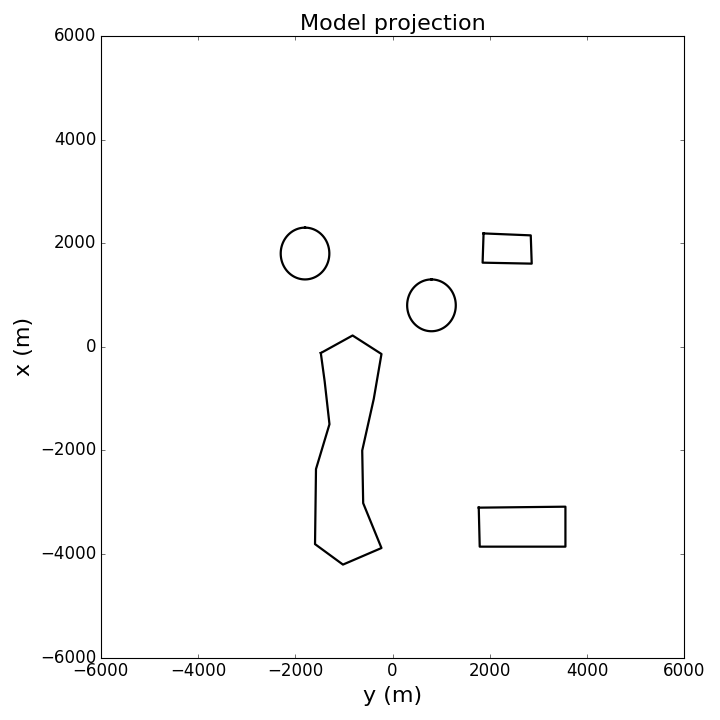

In [32]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.title('Model projection',fontsize=title_font)

plt.plot(model_remanent['y1_verts'],model_remanent['x1_verts'], 
         color='k',linestyle='-',linewidth=2)
plt.plot(model_remanent['y2_verts'],model_remanent['x2_verts'], 
         color='k',linestyle='-',linewidth=2)
plt.plot(model_remanent['y3_verts'],model_remanent['x3_verts'], 
         color='k',linestyle='-',linewidth=2)

plt.plot(model_remanent['radius1']*np.sin(theta)+ model_remanent['yc1'] ,
         model_remanent['radius1']*np.cos(theta)+ model_remanent['xc1'], 
         color='k',linestyle='-',linewidth=2)

plt.plot(model_remanent['radius2']*np.sin(theta)+ model_remanent['yc2'] ,
         model_remanent['radius2']*np.cos(theta)+ model_remanent['xc2'], 
         color='k',linestyle='-',linewidth=2)

plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.ylim(np.min(regular['x']),np.max(regular['x']))
plt.xlim(np.min(regular['y']),np.max(regular['y']))
plt.tick_params(labelsize=15)

file_name = 'figs/model_projection'
plt.savefig(file_name+'.png',dpi=200)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=200)
saved_files.append(file_name+'.eps')


plt.show()

#### Saved files

In [33]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/model_remanent.pickle
2  figs/model_projection.png
3  figs/model_projection.eps
